In [1]:
import pandas as pd
import numpy as np

filename = "/lustre/isaac/scratch/tmengel/jet-background-subtraction/datasets/root-files/AuAu_R04/test/AuAu_R04_50_test_sample.h5"
pdf = pd.read_hdf(filename, key='df')

Variables =  ['event_cent_bin', 'event_multiplicity', 'event_pt_hard_bin', 'event_weight', 'jet_angularity',
            'jet_angularity_truth', 'jet_area', 'jet_area_truth', 'jet_average_track_pt', 'jet_average_track_pt_truth',
            'jet_eta', 'jet_eta_truth', 'jet_nparts', 'jet_nparts_pythia', 'jet_nparts_truth',
            'jet_phi', 'jet_phi_truth', 'jet_pt_area_corrected', 'jet_pt_multiplicity_corrected',
            'jet_pt_pythia', 'jet_pt_pythia_fraction', 'jet_pt_raw', 'jet_pt_truth', 'jet_r_parameter',
            'jet_track_deltaR_0', 'jet_track_deltaR_1', 'jet_track_deltaR_truth_0', 'jet_track_deltaR_truth_1',
            'jet_track_energy_fraction_0', 'jet_track_energy_fraction_1', 'jet_track_energy_fraction_truth_0',
            'jet_track_energy_fraction_truth_1', 'jet_track_pt_0', 'jet_track_pt_1', 'jet_track_pt_2', 'jet_track_pt_3',
            'jet_track_pt_4', 'jet_track_pt_5', 'jet_track_pt_6', 'jet_track_pt_7', 'jet_track_pt_8', 'jet_track_pt_9',
            'jet_track_pt_kurtosis', 'jet_track_pt_kurtosis_truth', 'jet_track_pt_skewness', 'jet_track_pt_skewness_truth',
            'jet_track_pt_truth_0', 'jet_track_pt_truth_1', 'jet_track_pt_truth_2', 'jet_track_pt_truth_3', 'jet_track_pt_truth_4',
            'jet_track_pt_truth_5', 'jet_track_pt_truth_6', 'jet_track_pt_truth_7', 'jet_track_pt_truth_8', 'jet_track_pt_truth_9',
            'jet_track_pt_variance', 'jet_track_pt_variance_truth', 'median_pt_over_area', 'median_pt_over_npart', 'random_cone_nparts',
            'random_cone_nparts_pythia', 'random_cone_pt']

# Test_Variables =  ['jet_angularity',
#              'jet_area', 'jet_average_track_pt', 
#              'jet_nparts',
#              'jet_pt_raw', 
#              'jet_track_deltaR_0', 'jet_track_deltaR_1',
#              'jet_track_energy_fraction_0', 'jet_track_energy_fraction_1', 
#              'jet_track_pt_0', 'jet_track_pt_1', 'jet_track_pt_2', 'jet_track_pt_3',
#              'jet_track_pt_4', 'jet_track_pt_5', 'jet_track_pt_6', 'jet_track_pt_7', 'jet_track_pt_8', 'jet_track_pt_9',
#              'jet_track_pt_kurtosis',  'jet_track_pt_skewness', 
#              'jet_track_pt_variance', 'median_pt_over_area', 'median_pt_over_npart', 'random_cone_nparts', 'random_cone_pt']

Test_Variables =  ['jet_angularity',
             'jet_area', 'jet_average_track_pt', 
             'jet_nparts',
             'jet_pt_raw', 
             'jet_track_pt_0', 'jet_track_pt_1', 'jet_track_pt_2', 'jet_track_pt_3',
             'jet_track_pt_4', 'jet_track_pt_5', 'jet_track_pt_6', 'jet_track_pt_7']

Test_Variables_tex =  [r'$\lambda_{\alpha=1}$',
                       r'$A_{\mathrm{jet}}$', r'$\langle p_{\mathrm{T,track}} \rangle$',
                       r'$N_{\mathrm{track}}$', r'$p_{\mathrm{T,raw}}$',
                       r'$\Delta R_{0}$', r'$\Delta R_{1}$',
                       r'$f_{E,0}$', r'$f_{E,1}$',
                       r'$p_{\mathrm{T,track}}^{0}$', r'$p_{\mathrm{T,track}}^{1}$', r'$p_{\mathrm{T,track}}^{2}$', r'$p_{\mathrm{T,track}}^{3}$',
                       r'$p_{\mathrm{T,track}}^{4}$', r'$p_{\mathrm{T,track}}^{5}$', r'$p_{\mathrm{T,track}}^{6}$', r'$p_{\mathrm{T,track}}^{7}$', r'$p_{\mathrm{T,track}}^{8}$', r'$p_{\mathrm{T,track}}^{9}$',
                       r'$\kappa_{p_{\mathrm{T,track}}}$', r'$\gamma_{p_{\mathrm{T,track}}}$',
                       r'$\sigma_{p_{\mathrm{T,track}}}$', r'$\rho_{area}$', r'$\rho_{mult}$', r'$N_{\mathrm{track}}^{\mathrm{cone}}$', r'$p_{\mathrm{T}}^{\mathrm{cone}}$']
Test_Variables_tex =  [r'$\lambda_{\alpha=1}$',
                       r'$A_{\mathrm{jet}}$', r'$\langle p_{\mathrm{T,track}} \rangle$',
                       r'$N_{\mathrm{track}}$', r'$p_{\mathrm{T,raw}}$',
                       r'$p_{\mathrm{T,track}}^{0}$', r'$p_{\mathrm{T,track}}^{1}$', r'$p_{\mathrm{T,track}}^{2}$', r'$p_{\mathrm{T,track}}^{3}$',
                       r'$p_{\mathrm{T,track}}^{4}$', r'$p_{\mathrm{T,track}}^{5}$', r'$p_{\mathrm{T,track}}^{6}$', r'$p_{\mathrm{T,track}}^{7}$']


target = 'jet_pt_truth'
pdf['correction'] = pdf['jet_pt_truth']-pdf['jet_pt_raw']

In [2]:
from sklearn.feature_selection import mutual_info_regression, f_regression, r_regression

# mi_array = mutual_info_regression(pdf[Test_Variables], pdf[target], random_state=0)
# mi_array /= np.sum(mi_array)

# var_score = pdf[Test_Variables].var().sort_values(ascending=False)
# var_score /= np.sum(var_score)

# # f_score = f_regression(pdf[Test_Variables], pdf[target])[0]
# # f_score /= np.sum(f_score)

# r_score = r_regression(pdf[Test_Variables], pdf[target])
# r_score /= np.sum(r_score)

# Scores to correction 
mi_array_correction = mutual_info_regression(pdf[Test_Variables], pdf['correction'], random_state=0)
mi_array_correction /= np.sum(mi_array_correction)

# f_score_correction = f_regression(pdf[Test_Variables], pdf['correction'])[0]
# f_score_correction /= np.sum(f_score_correction)

# r_score_correction = r_regression(pdf[Test_Variables], pdf['correction'])
# r_score_correction /= np.sum(r_score_correction)

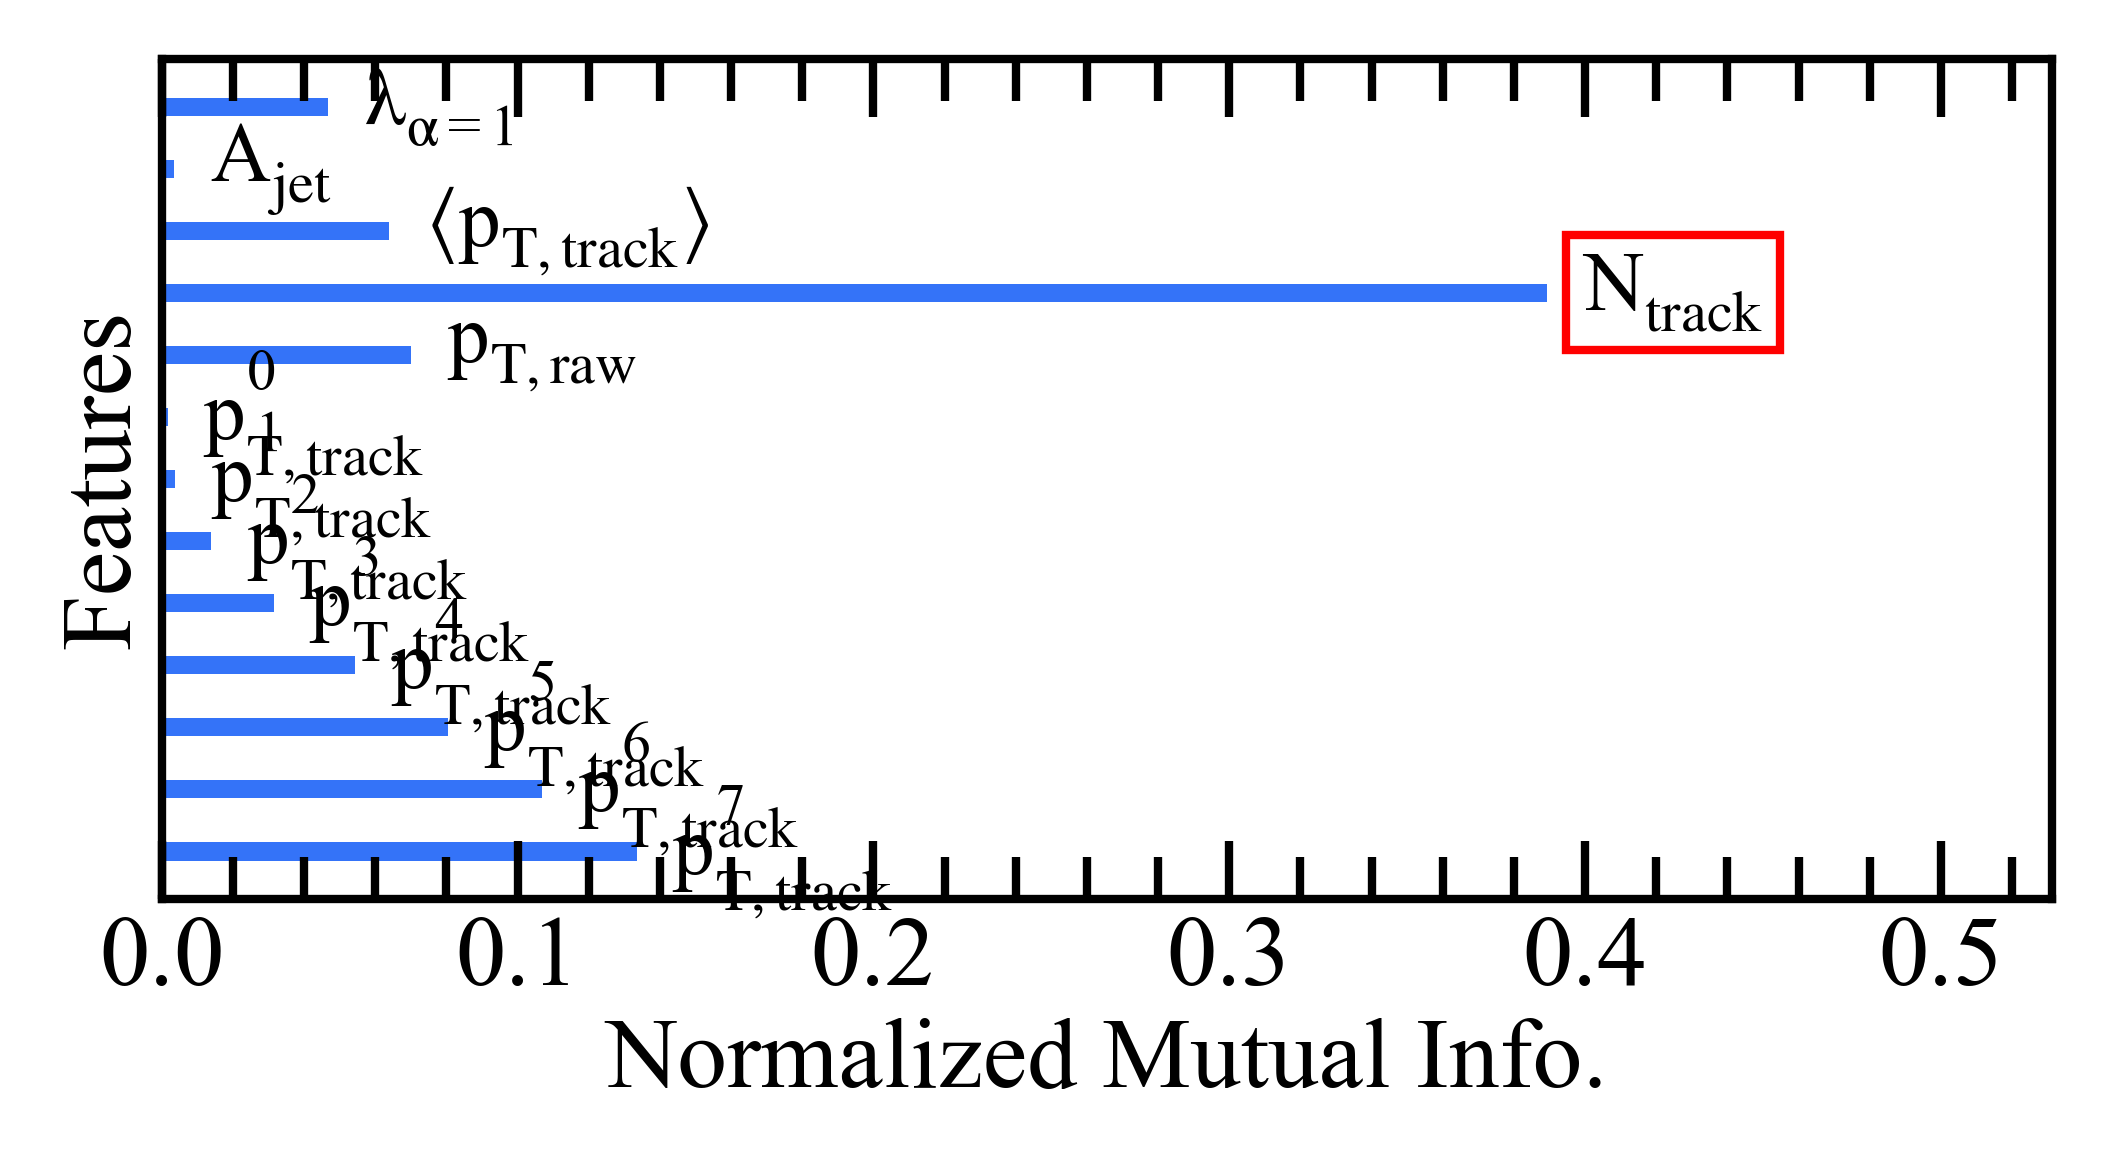

In [31]:
import paperstyle as ps
import matplotlib.pyplot as plt

fig_size = ps.GetFigSize(246, 2.3)
plt.rcParams.update(ps.style)
plt.rcParams.update({'figure.figsize': fig_size})

# category_names = ['Mutual Information', 'Pearson Correlation', 'Variance']
category_names = ['Mutual Information']
results = {}
for i in range(len(Test_Variables)):
    # results[Test_Variables_tex[i]] = [ mi_array_correction[i],  r_score[i], var_score[i]]
    results[Test_Variables_tex[i]] = [ mi_array_correction[i]]

labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)

category_colors = plt.get_cmap('rainbow')(
    np.linspace(0.15, 0.85, data.shape[1]))

fig = plt.figure(dpi=600,constrained_layout=True)
ax = fig.add_subplot(111)
ax.invert_yaxis()

barheights = []
barwidths = []
for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts,
            label=colname, color=color, height=0.3)
    xcenters = starts + widths / 2


# write variable names after bar
for bar, label in zip(ax.patches, labels):
    width = bar.get_width()
    if label == r'$N_{\mathrm{track}}$':
        # draw red circle around Ntrack
        ax.text(width + 0.01, bar.get_y() + bar.get_height()/2, label, ha='left', va='center', fontsize=10, bbox=dict(facecolor='none', edgecolor='red', pad=2.0))
    else:
        ax.text(width + 0.01, bar.get_y() + bar.get_height()/2, label, ha='left', va='center', fontsize=10)

# turn off y-axis ticks
ax.tick_params(axis='y', which='both',length=0)
# ax.tick_params(axis='y', which='major',length=2)
#turn of y-axis labels
ax.tick_params(axis='y', which='both',labelleft=False)

#plot line for top 6 variables
totals = data_cum[:,-1]

# idx = np.argsort(totals)
# xline = totals[idx][-5]
# ax.axvline(x=0.15, color='k', linestyle='--', label='Top 5 Features', linewidth=1.0)
# ax.legend(frameon=False, loc='best')
ax.set_xlabel('Normalized Mutual Info.', fontsize=12, loc='center')
ax.set_ylabel('Features', fontsize=12, loc='center')
#center axis titles
# ax.




# ax.set_title('Feature Importance')
ax.set_xlim(0, ax.get_xlim()[1]*1.3)
plt.show()
# fig.savefig('Feature_Importance.pdf', bbox_inches='tight')

# fig.savefig('pdf/FeatureImportance.pdf', bbox_inches='tight')
# fig.savefig('pdf/FeatureImportance.png', bbox_inches='tight')